# Community Detection on Coal using NetworkX

## Loading Data into Graph

In [9]:
import os, pickle, sys
import json
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from shapely import geometry

import geopandas as gpd

In [10]:
import pandas as pd
import numpy as np
import networkx as nx

In [11]:
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [12]:
sys.path.append(root)

In [13]:
from ffsc.flow import *

In [14]:
# dictionary assigning colors to different features of the network
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [15]:
# dictionary assigning paths to .csv files
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe_alt.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

In [20]:
gen = make_nx('coal')

carrier: coal
recipes used: coal


In [9]:
gen.all_data_dirs = all_data_dirs

In [10]:
gen._load_dfs()

In [11]:
gen._fill_graph()

INFO:ffsc.flow.network_flow:doing step add coalmines -> railways...
INFO:ffsc.flow.network_flow:doing step add railways -> railways...
INFO:ffsc.flow.network_flow:doing step add railways <- railways...
INFO:ffsc.flow.network_flow:doing step add railways -> ports...
INFO:ffsc.flow.network_flow:ports-railways missing distance
INFO:ffsc.flow.network_flow:['Unnamed: 0', 'Unnamed: 0.1', 'PortNode:START_ID(PortNode)', 'RailwayNodeID:END_ID(PipelineNode)', ':TYPE']
INFO:ffsc.flow.network_flow:doing step add railways <- ports...
INFO:ffsc.flow.network_flow:doing step add ports -> shipping_lanes...
INFO:ffsc.flow.network_flow:ports-shipping missing distance
INFO:ffsc.flow.network_flow:['PortNode:START_ID(PortNode)', 'ShipNode:END_ID(ShippingNode)', ':TYPE', 'impedance']
INFO:ffsc.flow.network_flow:doing step add ports <- shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes -> shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes <- shipping_lanes...


In [12]:
gen._prep_flow()

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
scope power stations) 17876 28664
INFO:ffsc.flow.network_flow:checking powerstation paths...
INFO:ffsc.flow.network_flow:ii_p 0, p_count 0
INFO:ffsc.flow.network_flow:ii_p 1000, p_count 304
INFO:ffsc.flow.network_flow:ii_p 2000, p_count 567
INFO:ffsc.flow.network_flow:ii_p 3000, p_count 582
INFO:ffsc.flow.network_flow:ii_p 4000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 5000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 6000, p_count 608
INFO:ffsc.flow.network_flow:ii_p 7000, p_count 652
INFO:ffsc.flow.network_flow:ii_p 8000, p_count 705
INFO:ffsc.flow.network_flow:ii_p 9000, p_count 751
INFO:ffsc.flow.network_flow:ii_p 10000, p_count 757
INFO:ffsc.flow.network_flow:ii_p 11000, p_count 759
INFO:ffsc.flow.network_flow:ii_p 12000, p_count 780
INFO:ffsc.flow.network_flow:ii_p 13000, p_count 796
INFO:ffsc.flow.network_flo

# Community Detection

In [15]:
from networkx.algorithms import community
import community as community_louvain ### this is a different package from the networkx.algorithm package 'community'

In [16]:
asyn_lpa = community.asyn_lpa_communities(gen.G) # Returns communities in G as detected by asynchronous label propagation.
type(asyn_lpa)

dict_valueiterator

In [17]:
asyn_lpa_list = list(asyn_lpa) # convert from iterator to a list!

In [18]:
print(len(asyn_lpa_list)) # number of communities
print(len(min(asyn_lpa_list, key=len))) # size of the smallest community (last in the list)
print(len(max(asyn_lpa_list, key=len))) # size of the largest community (first in the list)

374940
1
52


In [19]:
x = []
for i in range(0, len(asyn_lpa_list)):
    a = len(asyn_lpa_list[i])
    x.append(a)

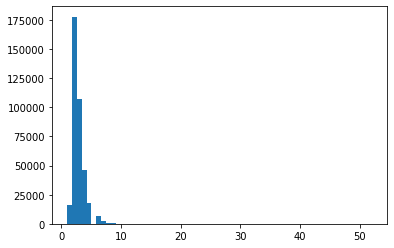

In [20]:
plt.hist(x, bins = 63)
plt.show()

In [21]:
count = 0
for i in range(0, len(asyn_lpa_list)):
    a = len(asyn_lpa_list[i])
    if a >= 10:
        count += 1
print(count)

190


{'railway_node_25.9047571-24.6667781', 'railway_node_25.9047571-24.6664075', 'railway_node_25.9047254-24.6670633', 'coal_mine_1920'}


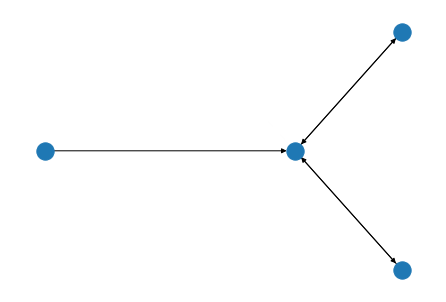

In [22]:
# print list of nodes in community

community_num = 0 

G_sub = gen.G.subgraph(asyn_lpa_list[community_num])
print(asyn_lpa_list[community_num])
nx.draw_kamada_kawai(G_sub, with_labels=False)
plt.show()